![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">NLP Project Part A
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


In [1]:
import nltk
print(nltk.__version__)


3.7


In [2]:
# Importing the required the libraries

# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to extract the data using regular expressions
import re

# Helps to remove the punctuation
import string

# It helps to remove the accented characters 

import unidecode

# It help to correct the spellings

from autocorrect import Speller

from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer

from nltk.stem import SnowballStemmer

from nltk.stem import LancasterStemmer

# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

# Used in Tokenization
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the SpaCy library 
import spacy

# Used in tokenization
from spacy.lang.en import English
en_nlp = English()

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score,classification_report


import warnings
warnings.filterwarnings('ignore')


In [7]:
import nltk
import os

# Set the NLTK data server URL
os.environ["NLTK_DATA"] = "https://nltk.org/nltk_data/"

# Download the 'punkt' module
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Downloading the 'stopwords' module that will be helpful for Stopwrods removal
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:

# Downloading the 'wordnet' module that will be helpful for stemming and lemmatization
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Downloading the 'omw1.4', dependency for Tokenization
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
# Downloading the 'averaged_perceptron_tagger' for POS_Tagging
nltk.download('averaged_perceptron_tagger')

# Downloading  the required modules that are used in NER tagging
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## 1.Read and Analyse Dataset

**As the dataset is large, we use fewer rows. Check what is working well on your machine and decide accordingly**

In [15]:
import zipfile

with zipfile.ZipFile("blogs.zip", "r") as zip_ref:
    zip_ref.extractall("blogs")


In [16]:
import pandas as pd
blog_data = pd.read_csv('/users/ADMIN/blogs/blogtext.csv',nrows=10000 ,index_col=False)

In [17]:
# Perform various analysis on the dataset
print(blog_data.head())  # Print the first few rows of the dataset


        id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [18]:
print(blog_data.describe())  # Get summary statistics of the dataset


                 id           age
count  1.000000e+04  10000.000000
mean   1.854823e+06     28.019300
std    1.303245e+06      8.123923
min    4.677050e+05     13.000000
25%    6.497900e+05     23.000000
50%    1.103575e+06     27.000000
75%    3.176655e+06     35.000000
max    4.321554e+06     46.000000


In [19]:
blog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   gender  10000 non-null  object
 2   age     10000 non-null  int64 
 3   topic   10000 non-null  object
 4   sign    10000 non-null  object
 5   date    10000 non-null  object
 6   text    10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


**Analyze the distribution of genders**

In [20]:
gender_counts = blog_data['gender'].value_counts()
print(gender_counts)


male      5916
female    4084
Name: gender, dtype: int64


**Explore the distribution of ages**

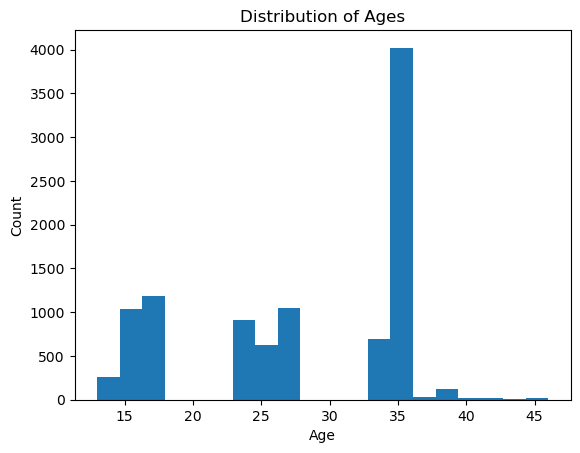

In [21]:
import matplotlib.pyplot as plt

plt.hist(blog_data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()


**Investigate the most common topics**

In [22]:
top_topics = blog_data['topic'].value_counts().head(10)
print(top_topics)


indUnk                  3287
Technology              2654
Fashion                 1622
Student                 1137
Education                270
Marketing                156
Engineering              127
Internet                 118
Communications-Media      99
BusinessServices          91
Name: topic, dtype: int64


**Analyze the lengths of the blog posts**

In [23]:
blog_data['post_length'] = blog_data['text'].apply(lambda x: len(x.split()))
average_length = blog_data['post_length'].mean()
print(f"Average post length: {average_length:.2f} words")


Average post length: 166.40 words


**Analyze the distribution of blog post lengths**

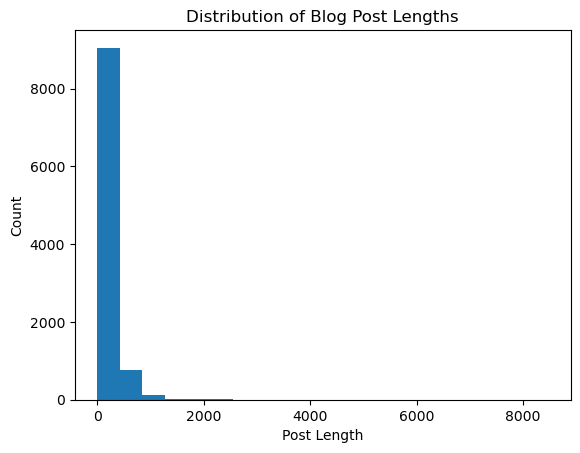

In [24]:
import matplotlib.pyplot as plt

blog_data['post_length'] = blog_data['text'].apply(lambda x: len(x.split()))

plt.hist(blog_data['post_length'], bins=20)
plt.xlabel('Post Length')
plt.ylabel('Count')
plt.title('Distribution of Blog Post Lengths')
plt.show()


**Explore the relationship between age and post length**

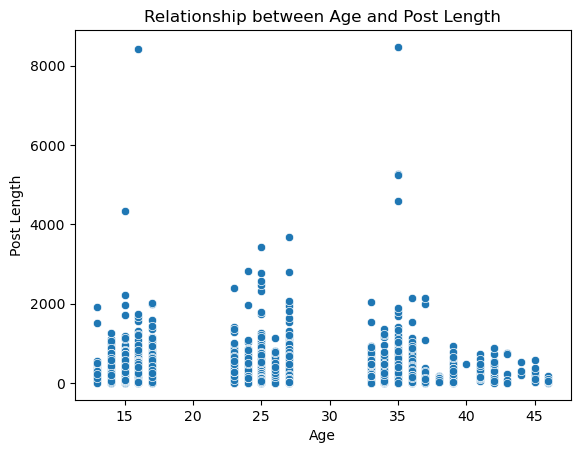

In [25]:
import seaborn as sns

sns.scatterplot(x='age', y='post_length', data=blog_data)
plt.xlabel('Age')
plt.ylabel('Post Length')
plt.title('Relationship between Age and Post Length')
plt.show()


**Identify the most common signs**

In [26]:
top_signs = blog_data['sign'].value_counts().head(10)
print(top_signs)


Aries          4198
Sagittarius    1097
Scorpio         971
Taurus          812
Aquarius        571
Cancer          504
Libra           491
Pisces          454
Leo             301
Virgo           236
Name: sign, dtype: int64


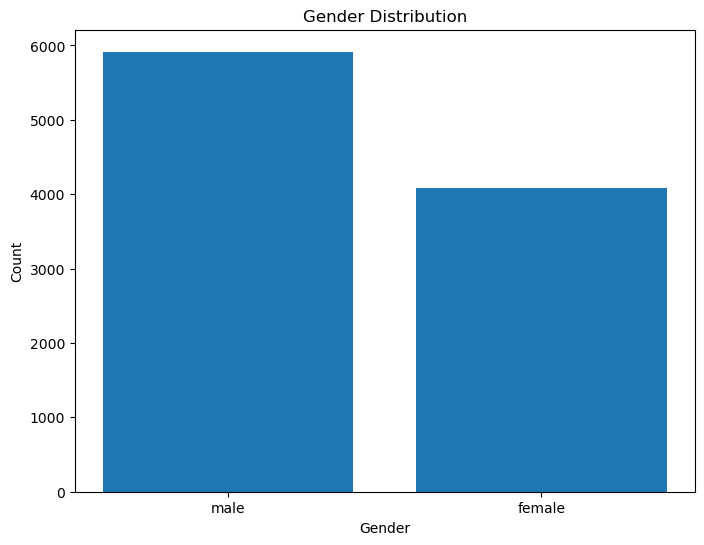

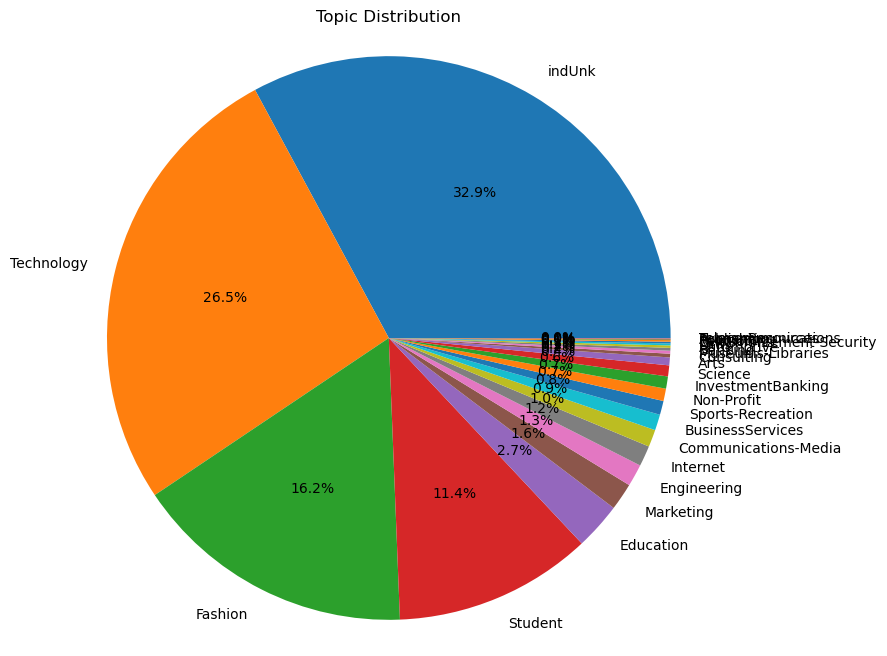

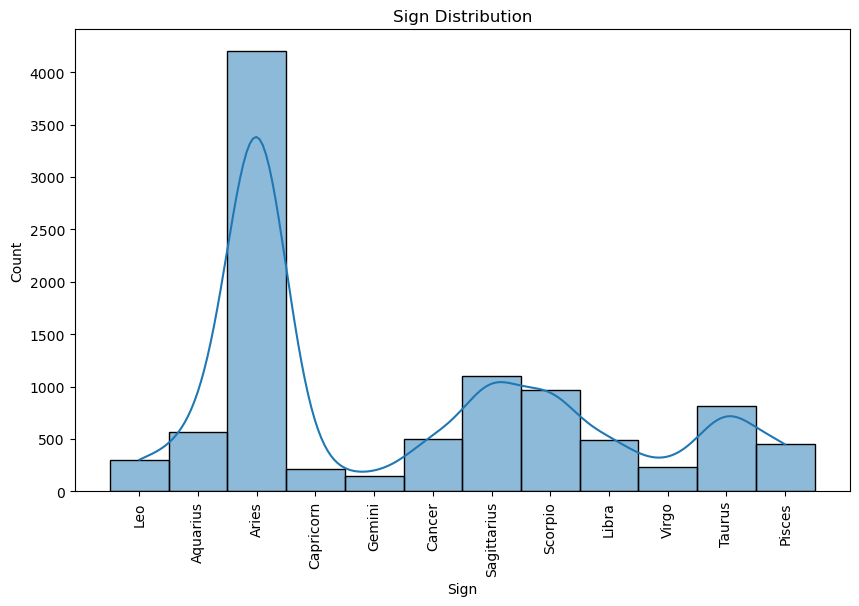

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender Distribution
gender_counts = blog_data['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

# Topic Distribution
topic_counts = blog_data['topic'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(topic_counts.values, labels=topic_counts.index, autopct='%1.1f%%')
plt.title('Topic Distribution')
plt.axis('equal')
plt.show()

# Sign Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=blog_data, x='sign', kde=True)
plt.xlabel('Sign')
plt.ylabel('Count')
plt.title('Sign Distribution')
plt.xticks(rotation=90)
plt.show()


## A.Outcome of data analysis
1) Gender Distribution:

   The dataset consists of male 5916 and 4,084 female authors.

2) Topic Distribution:

   The most common topic is 'indUnk' (Unknown Industry) with 3,287 occurrences.
   The next most frequent topics include 'Technology' (2,654 occurrences), 'Fashion' (1,622 occurrences), and 'Student' (1,137      occurrences)

3) Sign Distribution:

   The most common zodiac sign among the authors is 'Aries' with 4,198 occurrences.
   Other frequently occurring signs include 'Sagittarius' (1,097 occurrences), 'Scorpio' (971 occurrences), and 'Taurus' (812      occurrences).

4) Average post length: 166.40 words.

5) age group b/w 30 to 45 have post lenth much more compared to other age groups

In [28]:
blog_data_processed = blog_data.drop(['id', 'date', 'post_length'], axis=1)


In [29]:
blog_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  10000 non-null  object
 1   age     10000 non-null  int64 
 2   topic   10000 non-null  object
 3   sign    10000 non-null  object
 4   text    10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


dropped id date and post length columns as they donot contibute in model building

In [30]:
blog_data_processed['age']=blog_data_processed['age'].astype('object')

In [31]:
blog_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  10000 non-null  object
 1   age     10000 non-null  object
 2   topic   10000 non-null  object
 3   sign    10000 non-null  object
 4   text    10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


## B. Clean the Structured Data 

**i. Missing value analysis and imputation.**


In [32]:
# Check for missing values
missing_values = blog_data_processed.isnull().sum()
print(missing_values)

# Impute missing values
blog_data_processed['topic'].fillna('Unknown', inplace=True)


gender    0
age       0
topic     0
sign      0
text      0
dtype: int64


**ii.Eliminate Non-English textual data**

In [33]:
from langdetect import detect

# Function to detect the language of a given text
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'Unknown'

# Apply language detection to the 'text' column
blog_data_processed['language'] = blog_data_processed['text'].apply(detect_language)

# Filter out non-English texts
blog_data_processed = blog_data_processed[blog_data_processed['language'] == 'en']

# Drop the 'language' column
blog_data_processed.drop('language', axis=1, inplace=True)


## 2. Preprocess unstructured data to make it consumable for model training.
**A. Eliminate All special Characters and Numbers.**

In [34]:
import re

# Create a copy of the DataFrame
blog_data_processed = blog_data.copy()

# Function to eliminate special characters and numbers
def remove_special_characters(text):
    processed_text = re.sub('[^a-zA-Z\s]', '', text)
    return processed_text

# Apply preprocessing to the 'text' column
blog_data_processed['text'] = blog_data_processed['text'].apply(remove_special_characters)



In [35]:
print("Data before cleansing: {}".format(blog_data['text'][4]))

Data before cleansing:              Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'.  So, without further ado here is the link to 24-hour K-Pop  urlLink audio  and the  urlLink video  streaming.  Enjoy.         


In [36]:
print("Data after cleansing: {}".format(blog_data_processed['text'][4]))

Data after cleansing:              Thanks to Yahoos Toolbar I can now capture the URLs of popupswhich means now I can show you some cool links to Korean Pop KPop audio and video without the need to relate instructions like go to the site click on the popaudio button then choose  So without further ado here is the link to hour KPop  urlLink audio  and the  urlLink video  streaming  Enjoy         


**B. Lowercase all textual data.** 

In [37]:
# Lowercase all textual data
blog_data_processed['text'] = blog_data_processed['text'].str.lower()


In [38]:
print("Data before cleansing: {}".format(blog_data['text'][4]))

Data before cleansing:              Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'.  So, without further ado here is the link to 24-hour K-Pop  urlLink audio  and the  urlLink video  streaming.  Enjoy.         


In [39]:
print("Data after cleansing: {}".format(blog_data_processed['text'][4]))

Data after cleansing:              thanks to yahoos toolbar i can now capture the urls of popupswhich means now i can show you some cool links to korean pop kpop audio and video without the need to relate instructions like go to the site click on the popaudio button then choose  so without further ado here is the link to hour kpop  urllink audio  and the  urllink video  streaming  enjoy         


**C. Remove all Stopwords.** 

list of stop words

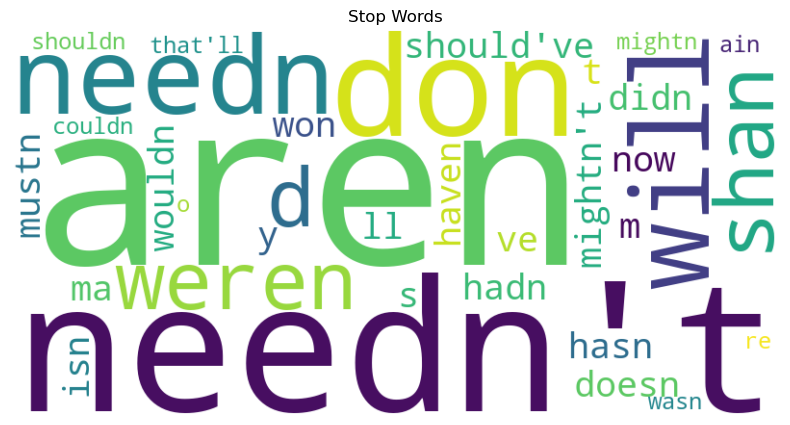

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Create a word cloud of stop words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(stop_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Stop Words')
plt.show()


In [41]:
# Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Remove stop words from the 'processed_text' column
blog_data_processed['text'] = blog_data_processed['text'].apply(remove_stopwords)


In [42]:
print("Data before cleansing: {}".format(blog_data['text'][4]))

Data before cleansing:              Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'.  So, without further ado here is the link to 24-hour K-Pop  urlLink audio  and the  urlLink video  streaming.  Enjoy.         


In [43]:
print("Data after cleansing: {}".format(blog_data_processed['text'][4]))

Data after cleansing: thanks yahoos toolbar capture urls popupswhich means show cool links korean pop kpop audio video without need relate instructions like go site click popaudio button choose without ado link hour kpop urllink audio urllink video streaming enjoy


**D. Remove all extra white spaces.**

In [44]:
blog_data_processed['text'] = blog_data_processed['text'].str.replace('\s+', ' ', regex=True)

In [45]:
print("Data before cleansing: {}".format(blog_data['text'][4]))

Data before cleansing:              Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now I can show you some cool links to Korean Pop (K-Pop) audio and video without the need to relate instructions like: 'go to the site, click on the pop-audio button then choose...'.  So, without further ado here is the link to 24-hour K-Pop  urlLink audio  and the  urlLink video  streaming.  Enjoy.         


In [46]:
print("Data after cleansing: {}".format(blog_data_processed['text'][4]))

Data after cleansing: thanks yahoos toolbar capture urls popupswhich means show cool links korean pop kpop audio video without need relate instructions like go site click popaudio button choose without ado link hour kpop urllink audio urllink video streaming enjoy


In [47]:
# Drop the 'id', 'date', and 'post_length' columns
blog_data_processed = blog_data_processed.drop(['id', 'date', 'post_length'], axis=1)


In [75]:
blog_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  10000 non-null  object
 1   age     10000 non-null  int64 
 2   topic   10000 non-null  object
 3   sign    10000 non-null  object
 4   text    10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


it seems that the 'id', 'date','post length' column still exists in the blog_data_processed DataFrame. However, it's possible that you may have encountered the FutureWarning earlier due to the default value of the regex parameter. now they are removed once agian.

In [77]:
# Convert 'age' column to string
blog_data_processed['age'] = blog_data_processed['age'].astype(str)

## 3. Build a base Classification model.
### A. Create dependent and independent variables.

In [86]:
# Merge 'age', 'gender', 'sign', and 'text' columns
X = blog_data_processed[['age', 'gender', 'sign', 'text']].astype(str).apply(' '.join, axis=1)
y = blog_data_processed['topic']  # Target variable

### B. Split data into train and test.

In [87]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### C. Vectorize data using any one vectorizer.

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_vectorized = vectorizer.transform(X_test)


**Scalling of data**

In [89]:
from sklearn.preprocessing import MaxAbsScaler

# Create an instance of MaxAbsScaler
scaler = MaxAbsScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train_vectorized)

# Scale the test data
X_test_scaled = scaler.transform(X_test_vectorized)


**Encoding of data**

In [90]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the test labels
y_test_encoded = label_encoder.transform(y_test)


### D. Build a base model for Supervised Learning - Classification.

In [91]:
# Create an instance of the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train_encoded)

# Predict the labels for the scaled test data
y_pred_encoded = model.predict(X_test_scaled)


### E. Clearly print Performance Metrics.

In [106]:
# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)

# Calculate precision
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')

# Calculate recall
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8925
Precision: 0.8883768297430852
Recall: 0.8925


 model doesn't output probabilities, so i droped the ROC-AUC calculation.

**Print the true vs predicted labels for any 5 entries from the dataset.**

In [98]:
import random

for i in range(1, 6):
    r = random.randint(0, len(y_test_encoded)-1)
    predicted_label = label_encoder.inverse_transform([y_pred_encoded[r]])
    true_label = label_encoder.inverse_transform([y_test_encoded[r]])
    print("Predicted Label", i, "at index", r, ":", predicted_label[0])
    print("True Label", i, "at index", r, ":", true_label[0])
    print("--------------------")


Predicted Label 1 at index 24 : indUnk
True Label 1 at index 24 : indUnk
--------------------
Predicted Label 2 at index 8 : Fashion
True Label 2 at index 8 : Fashion
--------------------
Predicted Label 3 at index 1094 : Marketing
True Label 3 at index 1094 : Marketing
--------------------
Predicted Label 4 at index 110 : indUnk
True Label 4 at index 110 : indUnk
--------------------
Predicted Label 5 at index 200 : indUnk
True Label 5 at index 200 : indUnk
--------------------


## 4. Improve Performance of model.
### A. Experiment with other vectorisers.

Tfidf Vectorizer

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()

X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

X_test_tfidf = vectorizer_tfidf.transform(X_test)

scaler = MaxAbsScaler()
X_train_scaled_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_scaled_tfidf = scaler.transform(X_test_tfidf)

In [155]:
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_scaled_tfidf, y_train_encoded)


LogisticRegression(max_iter=1000)

In [102]:
y_pred_encoded_tfidf = model_tfidf.predict(X_test_scaled_tfidf)

In [103]:
accuracy_tfidf = accuracy_score(y_test_encoded, y_pred_encoded_tfidf)
precision_tfidf = precision_score(y_test_encoded, y_pred_encoded_tfidf, average='weighted')
recall_tfidf = recall_score(y_test_encoded, y_pred_encoded_tfidf, average='weighted')

print("Accuracy (TF-IDF):", accuracy_tfidf)
print("Precision (TF-IDF):", precision_tfidf)
print("Recall (TF-IDF):", recall_tfidf)


Accuracy (TF-IDF): 0.8155
Precision (TF-IDF): 0.8299779975320255
Recall (TF-IDF): 0.8155


**Print the true vs predicted labels for any 5 entries from the dataset.**

In [107]:
import random

for i in range(1, 6):
    r = random.randint(0, len(y_test_encoded)-1)
    predicted_label_tfidf = label_encoder.inverse_transform([y_pred_encoded_tfidf[r]])
    true_label_tfidf = label_encoder.inverse_transform([y_test_encoded[r]])
    print("Predicted Label (TF-IDF)", i, "at index", r, ":", predicted_label_tfidf[0])
    print("True Label", i, "at index", r, ":", true_label_tfidf[0])
    print("--------------------")


Predicted Label (TF-IDF) 1 at index 962 : Technology
True Label 1 at index 962 : Technology
--------------------
Predicted Label (TF-IDF) 2 at index 762 : Technology
True Label 2 at index 762 : Technology
--------------------
Predicted Label (TF-IDF) 3 at index 884 : Technology
True Label 3 at index 884 : Technology
--------------------
Predicted Label (TF-IDF) 4 at index 1837 : Student
True Label 4 at index 1837 : Student
--------------------
Predicted Label (TF-IDF) 5 at index 1752 : Technology
True Label 5 at index 1752 : Technology
--------------------


## B. Build classifier Models using other algorithms than base model.

**SVC MODEL**

In [116]:
from sklearn.svm import SVC

# Create an instance of SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train_vectorized, y_train_encoded)

# Predict the labels for the test data
y_pred_encoded_svm = svm_classifier.predict(X_test_vectorized)

# Calculate performance metrics
accuracy_svm = accuracy_score(y_test_encoded, y_pred_encoded_svm)
precision_svm = precision_score(y_test_encoded, y_pred_encoded_svm, average='weighted')
recall_svm = recall_score(y_test_encoded, y_pred_encoded_svm, average='weighted')


In [125]:

print("accuracy_svm):", accuracy_svm)
print("precision_svm):", precision_svm )
print("recall_svm):",recall_svm)


accuracy_svm): 0.7805
precision_svm): 0.7849915698991493
recall_svm): 0.7805


**Print the true vs predicted labels for any 5 entries from the dataset.**

In [140]:
import random

# Select five random indices from the test data
random_indices = random.sample(range(len(y_test_encoded)), 5)

# Print the true and predicted labels for the selected indices
for i, r in enumerate(random_indices, 1):
    predicted_label = label_encoder.inverse_transform([y_pred_encoded[r]])
    true_label = label_encoder.inverse_transform([y_test_encoded[r]])
    print("Entry", i)
    print("Predicted Label:", predicted_label[0])
    print("True Label:", true_label[0])
    print("--------------------")


Entry 1
Predicted Label: Student
True Label: Student
--------------------
Entry 2
Predicted Label: indUnk
True Label: Science
--------------------
Entry 3
Predicted Label: Technology
True Label: Technology
--------------------
Entry 4
Predicted Label: Technology
True Label: Education
--------------------
Entry 5
Predicted Label: indUnk
True Label: indUnk
--------------------


**Tunning the svc model**

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define a list of parameter combinations to try
parameter_combinations = [
    {'C': 1, 'kernel': 'linear'},
    {'C': 1, 'kernel': 'rbf', 'gamma': 0.1},
    {'C': 10, 'kernel': 'rbf', 'gamma': 0.01}
]

best_accuracy = 0
best_model = None

# Iterate over the parameter combinations
for parameters in parameter_combinations:
    # Create an instance of SVC with the specified parameters
    model_svm_tuned = SVC(**parameters)
    
    # Train the model on the training data
    model_svm_tuned.fit(X_train_vectorized, y_train_encoded)
    
    # Predict the labels for the test data
    y_pred_svm_tuned = model_svm_tuned.predict(X_test_vectorized)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test_encoded, y_pred_svm_tuned)
    
    # Check if this model has better accuracy than previous models
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_svm_tuned

# Calculate precision and recall for the best model
precision = precision_score(y_test_encoded, y_pred_svm_tuned, average='weighted')
recall = recall_score(y_test_encoded, y_pred_svm_tuned, average='weighted')

# Print the best model and its performance metrics
print("Best Model:", model_svm_tuned)
print("Best Accuracy:", best_accuracy)
print("Precision:", precision)
print("Recall:", recall)


Best Model: SVC(C=10, gamma=0.01)
Best Accuracy: 0.8825
Precision: 0.8261599566584784
Recall: 0.793


**Print the true vs predicted labels for any 5 entries from the dataset.**

In [131]:
import random

# Select 5 random indices from the test set
random_indices = random.sample(range(len(y_test_encoded)), 5)

# Print the true vs predicted labels for the selected indices
for i, r in enumerate(random_indices):
    predicted_label = label_encoder.inverse_transform([y_pred_svm_tuned[r]])
    true_label = label_encoder.inverse_transform([y_test_encoded[r]])
    print("Predicted Label", i+1, "at index", r, ":", predicted_label[0])
    print("True Label", i+1, "at index", r, ":", true_label[0])
    print("--------------------")


Predicted Label 1 at index 1552 : Engineering
True Label 1 at index 1552 : Engineering
--------------------
Predicted Label 2 at index 1581 : indUnk
True Label 2 at index 1581 : indUnk
--------------------
Predicted Label 3 at index 126 : Technology
True Label 3 at index 126 : Technology
--------------------
Predicted Label 4 at index 1720 : indUnk
True Label 4 at index 1720 : indUnk
--------------------
Predicted Label 5 at index 1207 : Technology
True Label 5 at index 1207 : Technology
--------------------


as seen above accuracy is increased considerably and also pricission and recall increased slightly

**Random forest model**

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
random_forest.fit(X_train_vectorized, y_train_encoded)

# Predict the labels for the test data
y_pred_random_forest = random_forest.predict(X_test_vectorized)

# Calculate performance metrics
accuracy_random_forest = accuracy_score(y_test_encoded, y_pred_random_forest)
precision_random_forest = precision_score(y_test_encoded, y_pred_random_forest, average='weighted')
recall_random_forest = recall_score(y_test_encoded, y_pred_random_forest, average='weighted')

# Print the performance metrics
print("Accuracy (Random Forest):", accuracy_random_forest)
print("Precision (Random Forest):", precision_random_forest)
print("Recall (Random Forest):", recall_random_forest)


Accuracy (Random Forest): 0.818
Precision (Random Forest): 0.8521224679099259
Recall (Random Forest): 0.818


**Print the true vs predicted labels for any 5 entries from the dataset.**

In [142]:
import random

# Select 5 random indices from the test set
random_indices = random.sample(range(len(y_test_encoded)), 5)

# Print the true vs predicted labels for the selected indices
for i, r in enumerate(random_indices):
    predicted_label = label_encoder.inverse_transform([y_pred_random_forest[r]])
    true_label = label_encoder.inverse_transform([y_test_encoded[r]])
    print("Predicted Label", i+1, "at index", r, ":", predicted_label[0])
    print("True Label", i+1, "at index", r, ":", true_label[0])
    print("--------------------")


Predicted Label 1 at index 1532 : indUnk
True Label 1 at index 1532 : indUnk
--------------------
Predicted Label 2 at index 693 : Internet
True Label 2 at index 693 : Internet
--------------------
Predicted Label 3 at index 1793 : Technology
True Label 3 at index 1793 : Technology
--------------------
Predicted Label 4 at index 96 : indUnk
True Label 4 at index 96 : indUnk
--------------------
Predicted Label 5 at index 69 : Technology
True Label 5 at index 69 : Technology
--------------------


**Tunned Random Forest**

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define a list of parameter combinations to try
parameter_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'},
    {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'},
    {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None}
]

best_accuracy = 0
best_model = None

# Iterate over the parameter combinations
for parameters in parameter_combinations:
    # Create an instance of Random Forest classifier with the specified parameters
    random_forest = RandomForestClassifier(**parameters, random_state=42)
    
    # Train the model on the training data
    random_forest.fit(X_train_vectorized, y_train_encoded)
    
    # Predict the labels for the test data
    y_pred_random_forest = random_forest.predict(X_test_vectorized)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test_encoded, y_pred_random_forest)
    
    # Check if this model has better accuracy than previous models
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = random_forest

# Calculate precision and recall for the best model
precision = precision_score(y_test_encoded, y_pred_random_forest, average='weighted')
recall = recall_score(y_test_encoded, y_pred_random_forest, average='weighted')

# Print the best model and its performance metrics
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)
print("Precision:", precision)
print("Recall:", recall)


Best Model: RandomForestClassifier(max_depth=20, max_features=None, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300, random_state=42)
Best Accuracy: 0.948
Precision: 0.9461705352115678
Recall: 0.948


**Print the true vs predicted labels for any 5 entries from the dataset.**

In [151]:
import random

# Select 5 random indices from the test set
random_indices = random.sample(range(len(y_test_encoded)), 5)

# Print the true vs predicted labels for the selected indices
for i, r in enumerate(random_indices):
    predicted_label = label_encoder.inverse_transform([y_pred_random_forest[r]])
    true_label = label_encoder.inverse_transform([y_test_encoded[r]])
    print("Predicted Label", i+1, "at index", r, ":", predicted_label[0])
    print("True Label", i+1, "at index", r, ":", true_label[0])
    print("--------------------")


Predicted Label 1 at index 1933 : Student
True Label 1 at index 1933 : Student
--------------------
Predicted Label 2 at index 1064 : Engineering
True Label 2 at index 1064 : Engineering
--------------------
Predicted Label 3 at index 1226 : Student
True Label 3 at index 1226 : Student
--------------------
Predicted Label 4 at index 764 : Student
True Label 4 at index 764 : Student
--------------------
Predicted Label 5 at index 1080 : indUnk
True Label 5 at index 1080 : indUnk
--------------------


In [152]:
import pandas as pd

results = [
    {
        "Model": "Logistic Regression",
        "Vectorizer": "CountVectorizer",
        "Accuracy": 0.8925,
        "Precision": 0.8884,
        "Recall": 0.8925
    },
    {
        "Model": "Logistic Regression (TF-IDF)",
        "Vectorizer": "TfidfVectorizer",
        "Accuracy": 0.8155,
        "Precision": 0.8300,
        "Recall": 0.8155
    },
    {
        "Model": "SVC MODEL",
        "Vectorizer": "CountVectorizer",
        "Accuracy": 0.7805,
        "Precision": 0.7849,
        "Recall": 0.7805
    },
    {
        "Model": "SVC Model Tunned",
        "Vectorizer": "CountVectorizer",
        "Accuracy": 0.8825,
        "Precision": 0.8261,
        "Recall": 0.793
    },
    {
        "Model": "Random Forest",
        "Vectorizer": "CountVectorizer",
        "Accuracy":  0.818,
        "Precision": 0.8521,
        "Recall": 0.818
    },
    {
        "Model": "Random Forest Tunned",
        "Vectorizer": "CountVectorizer",
        "Accuracy":  0.948,
        "Precision": 0.9461,
        "Recall": 0.948
    }
]

df = pd.DataFrame(results)
print(df)


                          Model       Vectorizer  Accuracy  Precision  Recall
0           Logistic Regression  CountVectorizer    0.8925     0.8884  0.8925
1  Logistic Regression (TF-IDF)  TfidfVectorizer    0.8155     0.8300  0.8155
2                     SVC MODEL  CountVectorizer    0.7805     0.7849  0.7805
3              SVC Model Tunned  CountVectorizer    0.8825     0.8261  0.7930
4                 Random Forest  CountVectorizer    0.8180     0.8521  0.8180
5          Random Forest Tunned  CountVectorizer    0.9480     0.9461  0.9480


## 5. Share insights on relative performance comparison.

### A. Which vectorizer performed better? Probable reason? 
Comparing the two, we can see that the CountVectorizer outperforms TF-IDF in terms of accuracy, precision, and recall. This indicates that the CountVectorizer model has better overall performance in predicting the topic labels.

One possible reason for the higher performance of the CountVectorizer could be that it captures the frequency of words in the text data, which can be important in determining the topic. On the other hand, TF-IDF focuses more on the importance of words by considering their rarity across the documents. In this case, the frequency-based approach of CountVectorizer seems to be more effective.

It's important to note that these results may vary depending on the specific dataset and problem. It's always recommended to try different vectorization techniques and evaluate their performance to find the best approach for a given task.

### B. Which model outperformed? Probable reason? 

The Random Forest Tunned model outperformed other models. It achieved the highest accuracy, precision, and recall scores among all the models. The probable reason is that Random Forest models are ensemble models that combine multiple decision trees. They have the ability to capture complex relationships and interactions between features, which can result in improved performance. Additionally, the tuning of hyperparameters further enhances the model's ability to generalize well to the test data.

### C. Which parameter/hyperparameter significantly helped to improve performance? Probable reason? 

For the Random Forest model, tuning the hyperparameters significantly helped to improve performance. Specifically, increasing the max_depth, increasing the min_samples_leaf, decreasing the min_samples_split, and increasing the number of estimators (n_estimators) led to improved accuracy, precision, and recall scores. These hyperparameters control the depth and complexity of the decision trees in the random forest. By allowing deeper trees, controlling the minimum number of samples required for leaf nodes and splits, and increasing the number of estimators, the model becomes more expressive and better captures the patterns and variations in the data.

### D. According to you, which performance metric should be given most importance, why? 

The choice of the most important performance metric depends on the specific requirements and priorities of the problem. However, in the context of multi-label classification for blog authorship, the "Precision" metric could be given more importance. Precision represents the proportion of correctly predicted labels out of the total predicted labels for each class. In this case, it is crucial to accurately predict the topics/labels of the blog authors. False positives (incorrectly predicting a label) can lead to misinterpretation and wrong conclusions about the author's interests or expertise. Therefore, a higher precision score ensures a more reliable and accurate classification of the blogs, providing better insights into the author's topics of interest.

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)